In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [2]:
cn = ['age','sex','chest_pain_type','restbps','chol','blood_sugar','restecg','max_heartrate','exang','oldpeak','slope','num_mjr_vess','thal','dx']


df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', names=cn)

In [3]:
df.head()

,age,sex,chest_pain_type,restbps,chol,blood_sugar,restecg,max_heartrate,exang,oldpeak,slope,num_mjr_vess,thal,dx
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Data Checks

In [4]:
df.describe() # need to preprocess the data!

,age,sex,chest_pain_type,restbps,chol,blood_sugar,restecg,max_heartrate,exang,oldpeak,slope,dx
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [5]:
df.isnull().sum()

age                0
sex                0
chest_pain_type    0
restbps            0
chol               0
blood_sugar        0
restecg            0
max_heartrate      0
exang              0
oldpeak            0
slope              0
num_mjr_vess       0
thal               0
dx                 0
dtype: int64

In [6]:
df.isna().sum()

age                0
sex                0
chest_pain_type    0
restbps            0
chol               0
blood_sugar        0
restecg            0
max_heartrate      0
exang              0
oldpeak            0
slope              0
num_mjr_vess       0
thal               0
dx                 0
dtype: int64

In [7]:
df.shape

(303, 14)

In [8]:
df['dx'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: dx, dtype: int64

In [9]:
df.dtypes

age                float64
sex                float64
chest_pain_type    float64
restbps            float64
chol               float64
blood_sugar        float64
restecg            float64
max_heartrate      float64
exang              float64
oldpeak            float64
slope              float64
num_mjr_vess        object
thal                object
dx                   int64
dtype: object

In [10]:
df.dtypes

age                float64
sex                float64
chest_pain_type    float64
restbps            float64
chol               float64
blood_sugar        float64
restecg            float64
max_heartrate      float64
exang              float64
oldpeak            float64
slope              float64
num_mjr_vess        object
thal                object
dx                   int64
dtype: object

In [11]:
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')
df['num_mjr_vess'] = pd.to_numeric(df['num_mjr_vess'], errors='coerce')

df.dtypes


# Should I onehotencode these instead? 
# If so, do I add normal attributes or do I add the name of the new onehotencoder function?

age                float64
sex                float64
chest_pain_type    float64
restbps            float64
chol               float64
blood_sugar        float64
restecg            float64
max_heartrate      float64
exang              float64
oldpeak            float64
slope              float64
num_mjr_vess       float64
thal               float64
dx                   int64
dtype: object

In [12]:
df.head()

,age,sex,chest_pain_type,restbps,chol,blood_sugar,restecg,max_heartrate,exang,oldpeak,slope,num_mjr_vess,thal,dx
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [13]:
df.dropna(inplace=True)

In [14]:
df['heart_dx'] = df['dx'].apply(lambda x: 1 if x >= 1 else 0)

df.tail()

,age,sex,chest_pain_type,restbps,chol,blood_sugar,restecg,max_heartrate,exang,oldpeak,slope,num_mjr_vess,thal,dx,heart_dx
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


In [15]:
df['heart_dx'].value_counts(normalize=True)

0    0.538721
1    0.461279
Name: heart_dx, dtype: float64

In [16]:
df.shape

(297, 15)

In [17]:
df['sex'].value_counts()

1.0    201
0.0     96
Name: sex, dtype: int64

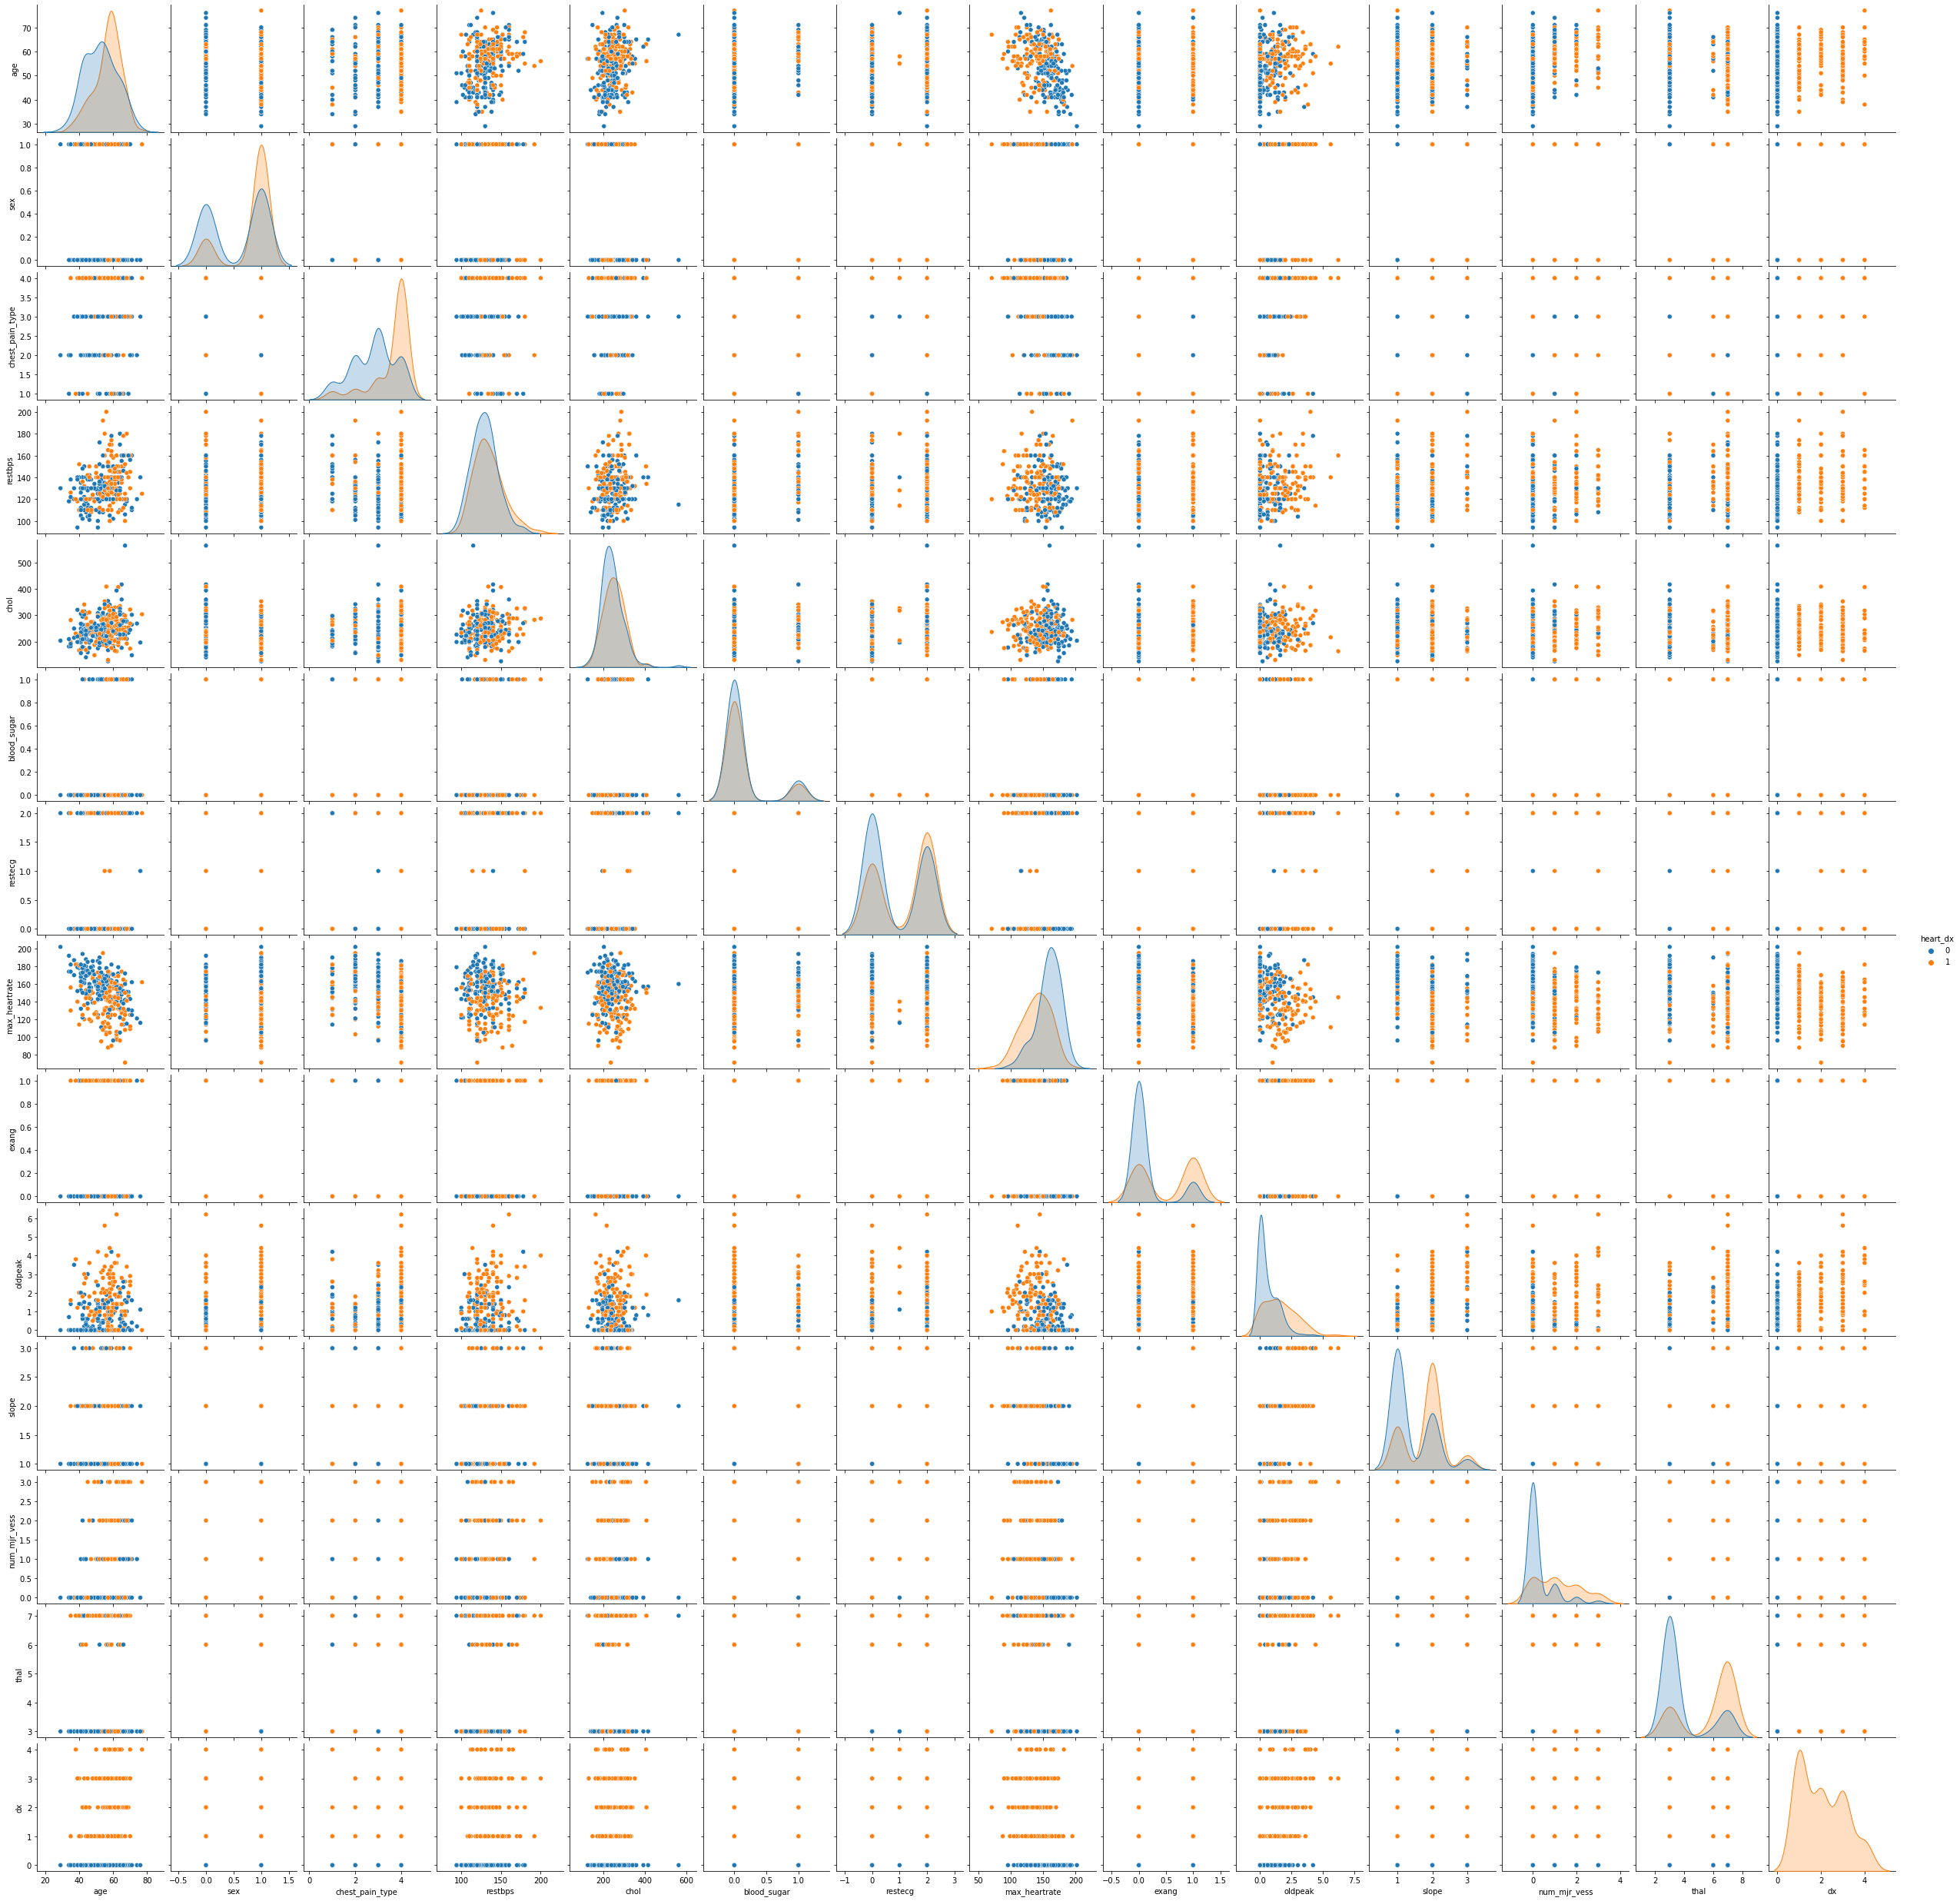

In [18]:
sns.pairplot(df, hue='heart_dx')

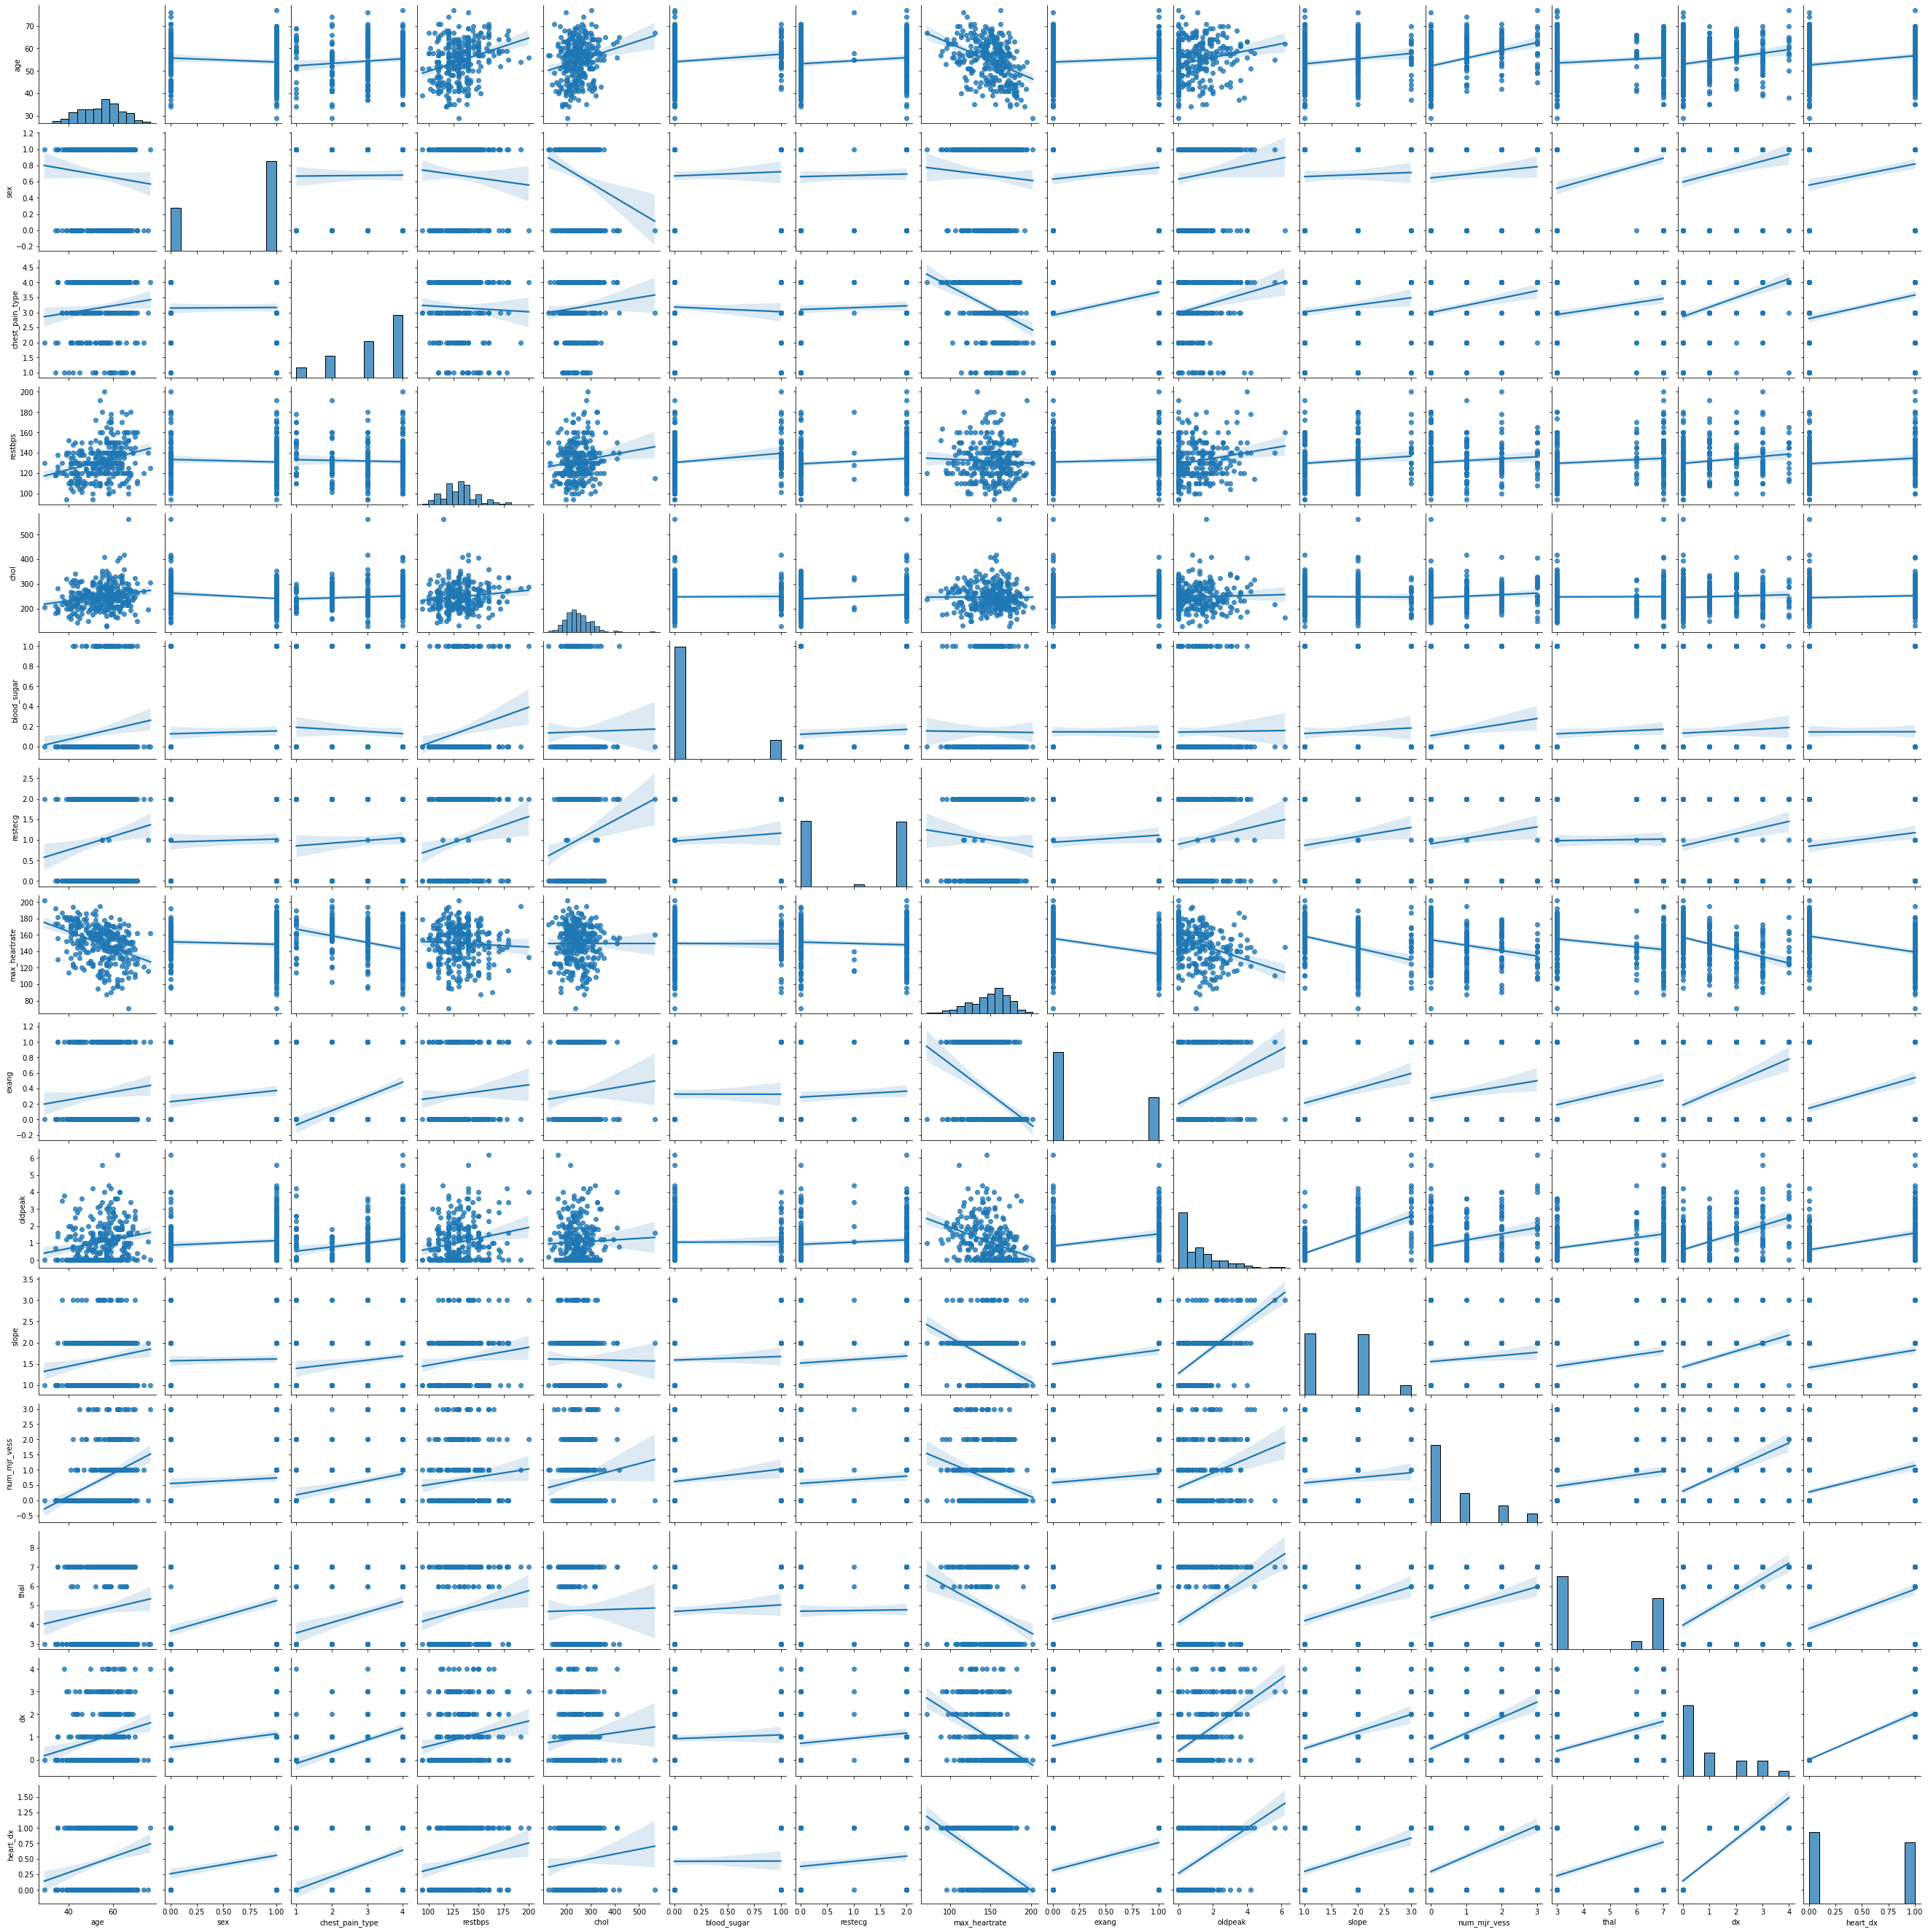

In [19]:
sns.pairplot(df, kind='reg')

## Creating specific columns for Men and Women to use in later analysis.

In [20]:
df['Men'] = df['sex'] == 1 # Males

df['Women'] = df['sex'] == 0 # Females

# df.head()

In [21]:
df['Men'] = pd.to_numeric(df['Men'], errors='coerce')

df['Women'] = pd.to_numeric(df['Women'], errors='coerce')

In [22]:
df.head()

,age,sex,chest_pain_type,restbps,chol,blood_sugar,restecg,max_heartrate,exang,oldpeak,slope,num_mjr_vess,thal,dx,heart_dx,Men,Women
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,True,False
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,True,False
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,True,False
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,True,False
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,False,True


---

## All Data Log Regression Models Comparing Different Attributes
### ***model_all***

This model shows what factors are significant factors. We used alpha=0.05 to determine each factors significance. Based on the results, we found that the significant factors are chest_pain_type, slope, num_mjr_vess, thal, restbps, and oldpeak.

In [23]:
model_all = 'heart_dx ~ age + sex + chest_pain_type + restbps + chol + blood_sugar + restecg + max_heartrate + slope + exang + oldpeak + age:sex'

result_all = smf.logit(formula=model_all, data=df).fit()
print(result_all.summary())

# lets say alpha = 0.05


# this model yielded potentially usefuly results for chest paint type, exang, oldpeak. Is this acceptable?
# This is totally different when adding sex as a factor (attribute).
# Would have to remove the categorical data here becasue onehotencoder didn't work?! 
# Should we keep this or scrap this?

Optimization terminated successfully.
         Current function value: 0.420448
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      284
Method:                           MLE   Df Model:                           12
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.3908
Time:                        17:30:04   Log-Likelihood:                -124.87
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 4.781e-28
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -7.3797      3.174     -2.325      0.020     -13.601      -1.159
age           

## ***model_1***
I reran another model to resasses the siginificance of each factor removing any factors that were not as siginificant from the first model: age, sex, chol, blood_sugar, restecg, slope, and age:sex interaction. However, when I ran this, restbps was no longer considered a significant factor anymore. Therefore, I removed it from the next model, *model_2*.

In [24]:
model_1 = 'heart_dx ~ chest_pain_type + restbps + max_heartrate + exang + oldpeak'

result_1 = smf.logit(formula=model_1, data=df).fit()
print(result_1.summary())


Optimization terminated successfully.
         Current function value: 0.473520
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      291
Method:                           MLE   Df Model:                            5
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.3139
Time:                        17:30:04   Log-Likelihood:                -140.64
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 4.545e-26
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.2496      1.760     -1.278      0.201      -5.699       1.199
chest_pain_typ

### ***model_2***

In [25]:
model_2 = 'heart_dx ~ chest_pain_type + max_heartrate + exang + oldpeak'

result_2 = smf.logit(formula=model_2, data=df).fit()
print(result_2.summary())



Optimization terminated successfully.
         Current function value: 0.479995
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            4
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.3045
Time:                        17:30:04   Log-Likelihood:                -142.56
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 4.964e-26
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0356      1.329     -0.027      0.979      -2.640       2.569
chest_pain_typ

---

## Comparison of Males Only with All Other Factors Included.
### ***model_Men_all***

This model shows what factors are significant factors for Men. We used alpha=0.05 to determine each factors significance. Based on the results, we found that the significant factors are the same as the above models: chest pain type, max heartrate, restbps, exang, and oldpeak. 

Likewise, instead of an interaction effect on Age and Sex, I used Men (males) and Age as the interaction effect.It proved to have no significance either.

In [26]:
model_Men_all = 'heart_dx ~ age + Men + chest_pain_type + restbps + chol + blood_sugar + restecg + max_heartrate + slope + exang + oldpeak + Men:age'

result_men_all = smf.logit(formula=model_Men_all, data=df).fit()
print(result_men_all.summary())

# lets say alpha = 0.05

#Same inital results, age and sex are not a significant factor.

Optimization terminated successfully.
         Current function value: 0.420448
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      284
Method:                           MLE   Df Model:                           12
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.3908
Time:                        17:30:04   Log-Likelihood:                -124.87
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 4.781e-28
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -7.3797      3.174     -2.325      0.020     -13.601      -1.159
Men[T.True]   

### ***model_Men1***

This model, I removed all insiginificant factors, including the interaction effect. That left the following factors to be considered significant: Chest pain type, max heartrate, exang, and oldpeak.. This is the same results as in *Model_1*. Removing the factor restbps as a factor before running the final model, *model_Men2*.

In [27]:
model_Men1 = 'heart_dx ~ chest_pain_type + restbps + max_heartrate + exang + oldpeak'

result_men1 = smf.logit(formula=model_Men1, data=df).fit()
print(result_men1.summary())

#age seems obsolete in this model. Changed it for the lowest p values from previous model.

Optimization terminated successfully.
         Current function value: 0.473520
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      291
Method:                           MLE   Df Model:                            5
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.3139
Time:                        17:30:04   Log-Likelihood:                -140.64
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 4.545e-26
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.2496      1.760     -1.278      0.201      -5.699       1.199
chest_pain_typ

### ***model_Men2***

In [28]:
model_Men2 = 'heart_dx ~ chest_pain_type + max_heartrate + exang + oldpeak'

result_men2 = smf.logit(formula=model_Men2, data=df).fit()
print(result_men2.summary())


Optimization terminated successfully.
         Current function value: 0.479995
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            4
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.3045
Time:                        17:30:05   Log-Likelihood:                -142.56
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 4.964e-26
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0356      1.329     -0.027      0.979      -2.640       2.569
chest_pain_typ

---

## Comparison of Women Only with All Other Factors Included.
### ***model_W_all***

This model shows what factors are significant factors for Women. We used alpha=0.05 to determine each factors significance. Based on the results, we found that the significant factors are the same as the above models for men and overall: chest pain type, max heartrate, restbps, exang, and oldpeak. 

Likewise, instead of an interaction effect on Age and Sex, I used Women (females) and Age as the interaction effect.It proved to have no significance either.

In [29]:
model_W_all = 'heart_dx ~ age + Women + chest_pain_type + restbps + chol + blood_sugar + restecg + max_heartrate + slope + exang + oldpeak + Women:age'

result_W_all = smf.logit(formula=model_W_all, data=df).fit()
print(result_W_all.summary())

# lets say alpha = 0.05
# model with all attributes

Optimization terminated successfully.
         Current function value: 0.420448
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      284
Method:                           MLE   Df Model:                           12
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.3908
Time:                        17:30:05   Log-Likelihood:                -124.87
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 4.781e-28
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -4.9552      2.488     -1.992      0.046      -9.832      -0.078
Women[T.

### ***model_W1***

In [30]:
model_W1 = 'heart_dx ~ chest_pain_type + restbps + max_heartrate + exang + oldpeak'

result_W1 = smf.logit(formula=model_W1, data=df).fit()
print(result_W1.summary())

#age seems obsolete in this model. Changed it for the lowest p values from previous model.

Optimization terminated successfully.
         Current function value: 0.473520
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      291
Method:                           MLE   Df Model:                            5
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.3139
Time:                        17:30:05   Log-Likelihood:                -140.64
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 4.545e-26
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.2496      1.760     -1.278      0.201      -5.699       1.199
chest_pain_typ

### ***model_W2***

In [31]:
model_W2 = 'heart_dx ~ chest_pain_type + max_heartrate + exang + oldpeak'

result_W2 = smf.logit(formula=model_W2, data=df).fit()
print(result_W2.summary())

Optimization terminated successfully.
         Current function value: 0.479995
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            4
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.3045
Time:                        17:30:05   Log-Likelihood:                -142.56
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 4.964e-26
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0356      1.329     -0.027      0.979      -2.640       2.569
chest_pain_typ

---

### Creating Age Ranges for Each of the Listed Individuals in the study. 
First, we wanted to understand the amount of individuals per age groupping.

Then we created a column to identify which age group each person belonged to.

In [32]:
df[df['age'].between(29,45)].shape[0]

61

In [33]:
df[df['age'].between(46, 60)].shape[0]

157

In [34]:
df[df['age'].between(61,77)].shape[0]

79

In [35]:
df[df['age'].between(62, 77)].shape[0]

71

In [36]:
df['Age_low'] = df['age'].between(29, 45)

In [37]:
df['Age_med'] = df['age'].between(46, 61) #smallest range but biggest volume

In [38]:
df['Age_high'] = df['age'].between(62, 77)

In [39]:
df.tail()

,age,sex,chest_pain_type,restbps,chol,blood_sugar,restecg,max_heartrate,exang,oldpeak,slope,num_mjr_vess,thal,dx,heart_dx,Men,Women,Age_low,Age_med,Age_high
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1,1,False,True,False,True,False
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,True,False,True,False,False
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,True,False,False,False,True
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,True,False,False,True,False
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,False,True,False,True,False


## Regression Model per Age Group All Other Factors Included.
### ***model_Age1***

This model shows what factors are significant factors for Lower Age range, 29 - 45. We used alpha=0.05 to determine each factors significance. Based on the results, we found that the significant factors are slightly different than the others. We found that the significant factors are ***sex***, chest pain type, restbps, max heartrate, exang, and oldpeak. 

Likewise, instead of an interaction effect on Age and Sex, I used Age_low in place of Age for the interaction effect. It proved to have no significance either.

In [40]:
model_Age1 = 'heart_dx ~ Age_low + sex + chest_pain_type + restbps + chol + blood_sugar + restecg + max_heartrate + slope + exang + oldpeak + Age_low:sex'

result_Age1 = smf.logit(formula=model_Age1, data=df).fit() 
print(result_Age1.summary())

# alpha = 0.05

Optimization terminated successfully.
         Current function value: 0.418016
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      284
Method:                           MLE   Df Model:                           12
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.3943
Time:                        17:30:05   Log-Likelihood:                -124.15
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 2.427e-28
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -5.4442      2.158     -2.523      0.012      -9.674      -1.215
Ag

## ***model_Age1a***

This model is slighly different than the previous. I included sex, with the same factors, it seems to be more significant.

In [41]:
model_Age1a = 'heart_dx ~ sex + chest_pain_type + restbps +  max_heartrate + exang + oldpeak'

result_Age1a = smf.logit(formula=model_Age1a, data=df).fit()
print(result_Age1a.summary())

# alpha = 0.05

Optimization terminated successfully.
         Current function value: 0.435038
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                            6
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.3696
Time:                        17:30:05   Log-Likelihood:                -129.21
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 3.667e-30
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.5124      1.827     -1.923      0.054      -7.092       0.068
sex           

### ***model_Age2***

This model shows what factors are significant factors for Medium Age range, 46 - 61. We used alpha=0.05 to determine each factors significance. Based on the results, we found that the significant factors are similar to *model_Age1* but still different. We found that the significant factors are ***sex***, chest pain type, ***chol***, restbps, max heartrate, exang, and oldpeak. 

Likewise, instead of an interaction effect on Age and Sex, I used Age_low in place of Age for the interaction effect. It proved to have no significance either.

In [42]:
model_Age2 = 'heart_dx ~ Age_med + sex + chest_pain_type + restbps + chol + max_heartrate + slope + exang + oldpeak + Age_med:sex'

result_Age2 = smf.logit(formula=model_Age2, data=df).fit()
print(result_Age2.summary())

# results are still pretty similar

Optimization terminated successfully.
         Current function value: 0.421054
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                           10
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.3899
Time:                        17:30:05   Log-Likelihood:                -125.05
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 3.496e-29
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -6.0291      2.171     -2.777      0.005     -10.285      -1.773
Ag

### model_Age2a

In [43]:
model_Age2a = 'heart_dx ~ sex + chest_pain_type + restbps + chol + max_heartrate + exang + oldpeak'

result_Age2a = smf.logit(formula=model_Age2a, data=df).fit()
print(result_Age2a.summary())

# results are still pretty similar
#alpha=0.05

Optimization terminated successfully.
         Current function value: 0.427624
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                            7
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.3804
Time:                        17:30:05   Log-Likelihood:                -127.00
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 2.294e-30
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.7825      1.960     -2.441      0.015      -8.623      -0.942
sex           

### ***model_Age3***

This model shows what factors are significant factors for Medium Age range, 62 - 77. We used alpha=0.05 to determine each factors significance. Based on the results, we found that the significant factors are similar to *model_Age1*. We found that the significant factors are sex, chest pain type, restbps, max heartrate, exang, and oldpeak. 

Likewise, instead of an interaction effect on Age and Sex, I used Age_high in place of Age for the interaction effect. It proved to have no significance either.

In [44]:
model_Age3 = 'heart_dx ~ Age_high + sex + chest_pain_type + restbps + chol + max_heartrate + slope + exang + oldpeak'

result_Age3 = smf.logit(formula=model_Age3, data=df).fit()
print(result_Age3.summary())


Optimization terminated successfully.
         Current function value: 0.425322
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                            9
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.3837
Time:                        17:30:05   Log-Likelihood:                -126.32
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 2.695e-29
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -5.4072      2.121     -2.549      0.011      -9.565      -1.250
Age_high[T.

In [45]:
model_Age3a = 'heart_dx ~ sex + chest_pain_type + restbps + max_heartrate + exang + oldpeak'

result_Age3a = smf.logit(formula=model_Age3a, data=df).fit()
print(result_Age3a.summary())

Optimization terminated successfully.
         Current function value: 0.435038
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               heart_dx   No. Observations:                  297
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                            6
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.3696
Time:                        17:30:05   Log-Likelihood:                -129.21
converged:                       True   LL-Null:                       -204.97
Covariance Type:            nonrobust   LLR p-value:                 3.667e-30
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.5124      1.827     -1.923      0.054      -7.092       0.068
sex           

In [46]:
df.head()

,age,sex,chest_pain_type,restbps,chol,blood_sugar,restecg,max_heartrate,exang,oldpeak,slope,num_mjr_vess,thal,dx,heart_dx,Men,Women,Age_low,Age_med,Age_high
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,True,False,False,False,True
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,True,False,False,False,True
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,True,False,False,False,True
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,True,False,True,False,False
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,False,True,True,False,False


### Validation of 3 models based on factors that were found significant.

In [47]:
Xo = df[['chest_pain_type','restbps','max_heartrate','exang','oldpeak']]

yo = df['heart_dx']


X_train, X_test, y_train, y_test = train_test_split(Xo, yo, random_state=40) 

X_test.shape


model = LogisticRegression()

model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:,1]

y_pred = model.predict(X_test)


In [48]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred) 

df_cm = pd.DataFrame(data=cm, columns=['predict: No Heart Disease', 'predict: Heart Disease'],
                    index=['true: No Heart Disease', 'true: Heart Disease'])

df_cm

,predict: No Heart Disease,predict: Heart Disease
true: No Heart Disease,30,5
true: Heart Disease,13,27


In [49]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77        35
           1       0.84      0.68      0.75        40

    accuracy                           0.76        75
   macro avg       0.77      0.77      0.76        75
weighted avg       0.78      0.76      0.76        75



In [50]:
Xo2 = df[['sex','chest_pain_type','restbps','max_heartrate','exang','oldpeak']]

yo2 = df['heart_dx']


X_train, X_test, y_train, y_test = train_test_split(Xo2, yo2, random_state=68) 

X_test.shape



model2 = LogisticRegression()

model2.fit(X_train, y_train)

y_proba2 = model2.predict_proba(X_test)[:,1]

y_pred2 = model2.predict(X_test)



/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
cm2 = metrics.confusion_matrix(y_test, y_pred2) 

df_cm2 = pd.DataFrame(data=cm2, columns=['predict: No Heart Disease', 'predict: Heart Disease'],
                    index=['true: No Heart Disease', 'true: Heart Disease'])

df_cm2

,predict: No Heart Disease,predict: Heart Disease
true: No Heart Disease,36,6
true: Heart Disease,8,25


In [52]:
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        42
           1       0.81      0.76      0.78        33

    accuracy                           0.81        75
   macro avg       0.81      0.81      0.81        75
weighted avg       0.81      0.81      0.81        75



In [53]:
Xo3 = df[['sex','chest_pain_type', 'chol','restbps','max_heartrate','exang','oldpeak']]

yo3 = df['heart_dx']


X_train, X_test, y_train, y_test = train_test_split(Xo3, yo3, random_state=33) 

X_test.shape


model3 = LogisticRegression()

model3.fit(X_train, y_train)

y_proba3 = model3.predict_proba(X_test)[:,1]

y_pred3 = model3.predict(X_test)




/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
cm3 = metrics.confusion_matrix(y_test, y_pred3) 

df_cm3 = pd.DataFrame(data=cm3, columns=['predict: No Heart Disease', 'predict: Heart Disease'],
                    index=['true: No Heart Disease', 'true: Heart Disease'])

df_cm3

,predict: No Heart Disease,predict: Heart Disease
true: No Heart Disease,32,6
true: Heart Disease,9,28


In [55]:
print(metrics.classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        38
           1       0.82      0.76      0.79        37

    accuracy                           0.80        75
   macro avg       0.80      0.80      0.80        75
weighted avg       0.80      0.80      0.80        75



## StatsModel Conclusions


The major factors to classifying heart disease are chest_pain_type, restbps, max_heartrate, exang, and oldpeak. However, when we analyzed the data specifically based on age ranges and for each regression model, ***sex*** was considered a significant factor. 

The middle age group, 46 - 61, found that ***chol*** is a significant factor. This age group had the largest population. This could indicate that choloesterol matters more based on age range?


I used the metrics function to assess the most accurate model, it seems that according to the statsmodel, leaving sex in as a significant factor increases the accruacy, Precision, Recall, and F1-Score are all almost the same otherwise. This makes for a slighlty inconclusive results to our original question.

In order to determine the best models. We decided to run two 3 pipeline using logistic regression, one using the following factors for each pipeline.

- Pipeline1: Factors = chest_pain_type, max_heartrate, exang, oldpeak
- Pipeline2: Factors = sex, chest_pain_type, max_heartrate, exang, oldpeak
- Pipeline3: Factors = sex, chest_pain_type, chol, max_heartrate, exang, oldpeak

---

---

---

In [56]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [57]:
cn = ['age','sex','chest_pain_type','restbps','chol','blood_sugar','restecg','max_heartrate','exang','oldpeak','slope','num_mjr_vess','thal','dx']


df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', names=cn)

In [58]:
df.head()

,age,sex,chest_pain_type,restbps,chol,blood_sugar,restecg,max_heartrate,exang,oldpeak,slope,num_mjr_vess,thal,dx
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [59]:
df.shape

(303, 14)

In [60]:
df['sex'] = df['sex'].astype(object)
df['chest_pain_type'] = df['chest_pain_type'].astype(object)
df['restecg'] = df['restecg'].astype(object)
df['exang'] = df['exang'].astype(object)
df['slope'] = df['slope'].astype(object)

In [61]:
df['num_mjr_vess'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: num_mjr_vess, dtype: int64

In [62]:
df['slope'].value_counts()

1.0    142
2.0    140
3.0     21
Name: slope, dtype: int64

In [63]:
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [64]:
df['heart_dx'] = df['dx'].apply(lambda x: 1 if x >= 1 else 0)

df.head()

,age,sex,chest_pain_type,restbps,chol,blood_sugar,restecg,max_heartrate,exang,oldpeak,slope,num_mjr_vess,thal,dx,heart_dx
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


In [65]:
df.dtypes

age                float64
sex                 object
chest_pain_type     object
restbps            float64
chol               float64
blood_sugar        float64
restecg             object
max_heartrate      float64
exang               object
oldpeak            float64
slope               object
num_mjr_vess        object
thal                object
dx                   int64
heart_dx             int64
dtype: object

## Pipeline 1
This pipeline includes all provided possible factors from the data set: age, sex, chest pain type, restbps, chol, blood sugar, restecg, max heartrate, exang, old peak, slope, number of major vessels, and thal.

In [66]:
features = df[['age','sex','chest_pain_type','restbps','chol','blood_sugar','restecg','max_heartrate','exang','oldpeak','slope','num_mjr_vess','thal']]

X = features

y = df['heart_dx']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.20,
                                                    stratify=y,
                                                    random_state=88
                                                   )
X_test.shape

#used stratify to equate those who have been diagnosed and those who haven't.

(61, 13)

### Preprocessing the Pipeline 1

In [67]:
from sklearn.impute import SimpleImputer

cat_imputed = SimpleImputer(missing_values='?', strategy='most_frequent').fit_transform(df[['sex', 'chest_pain_type', 'restecg', 'exang', 'slope', 'num_mjr_vess','thal']])

enc = OneHotEncoder(sparse=False)

enc.fit_transform(cat_imputed)


enc.categories_

[array([0.0, 1.0], dtype=object),
 array([1.0, 2.0, 3.0, 4.0], dtype=object),
 array([0.0, 1.0, 2.0], dtype=object),
 array([0.0, 1.0], dtype=object),
 array([1.0, 2.0, 3.0], dtype=object),
 array(['0.0', '1.0', '2.0', '3.0'], dtype=object),
 array(['3.0', '6.0', '7.0'], dtype=object)]

In [68]:
SimpleImputer(strategy='mean').fit_transform(df[['age','restbps','chol','blood_sugar','max_heartrate','oldpeak']]

)

array([[ 63. , 145. , 233. ,   1. , 150. ,   2.3],
       [ 67. , 160. , 286. ,   0. , 108. ,   1.5],
       [ 67. , 120. , 229. ,   0. , 129. ,   2.6],
       ...,
       [ 57. , 130. , 131. ,   0. , 115. ,   1.2],
       [ 57. , 130. , 236. ,   0. , 174. ,   0. ],
       [ 38. , 138. , 175. ,   0. , 173. ,   0. ]])

In [69]:
StandardScaler().fit_transform(df[['age','restbps','chol','blood_sugar','max_heartrate','oldpeak']]

)

array([[ 0.94872647,  0.75752504, -0.2649003 ,  2.394438  ,  0.01719733,
         1.08733806],
       [ 1.39200191,  1.61121989,  0.76041519, -0.41763453, -1.82190531,
         0.39718162],
       [ 1.39200191, -0.6652997 , -0.34228261, -0.41763453, -0.90235399,
         1.34614673],
       ...,
       [ 0.28381332, -0.0961698 , -2.23814899, -0.41763453, -1.51538821,
         0.13837295],
       [ 0.28381332, -0.0961698 , -0.20686358, -0.41763453,  1.06811312,
        -0.89686172],
       [-1.82174501,  0.35913411, -1.38694368, -0.41763453,  1.02432497,
        -0.89686172]])

In [70]:
# Begin making the pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

imp_ohe = make_pipeline(SimpleImputer(strategy='most_frequent'),
             OneHotEncoder(sparse=False))

imp_mean = make_pipeline(SimpleImputer(strategy='mean'),
                       StandardScaler())

preprocessor = make_column_transformer((imp_ohe, ['sex', 'chest_pain_type', 'restecg', 'exang', 'slope', 'num_mjr_vess','thal']),
                       (imp_mean, ['age','restbps','chol','blood_sugar','max_heartrate','oldpeak'])
                       )

In [71]:
clf1 = LogisticRegression()  

In [72]:
pipe1 = make_pipeline(preprocessor, clf1)
pipe1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['sex', 'chest_pain_type',
                                                   'restecg', 'exang', 'slope',
                                                   'num_mjr_vess', 'thal']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                       

In [73]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['sex', 'chest_pain_type',
                                                   'restecg', 'exang', 'slope',
                                                   'num_mjr_vess', 'thal']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                       

In [74]:
y_pred1 = pipe1.predict(X_test)
# y_pred

In [75]:
# from sklearn import set_config
# set_config(display='diagram')

# pipe1

In [76]:
from sklearn import metrics

print('R2 Metric', round(metrics.r2_score(y_test, y_pred1),2))

R2 Metric 0.34


In [77]:
from sklearn.model_selection import cross_val_score

- (cross_val_score(pipe1, X, y, cv=10, scoring='neg_root_mean_squared_error'))

array([0.3592106 , 0.31108551, 0.40160966, 0.25819889, 0.31622777,
       0.4472136 , 0.40824829, 0.31622777, 0.48304589, 0.4472136 ])

## Performed a Grid Search to determine best Pipeline to determine factors.

In [78]:
from sklearn.model_selection import GridSearchCV

pipe1.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(sparse=False))]),
                                    ['sex', 'chest_pain_type', 'restecg', 'exang',
                                     'slope', 'num_mjr_vess', 'thal']),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    ['age', 'restbps', 'chol', 'blood_sugar',
           

In [79]:
param_grid = {'columntransformer__pipeline-2__standardscaler':
              [StandardScaler(), MinMaxScaler(), 'passthrough'],
              'columntransformer__pipeline-2__simpleimputer__strategy':
              ['mean', 'median'],
              'logisticregression__fit_intercept': [True, False]
             }

In [80]:
gs = GridSearchCV(pipe1, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)

gs.fit(X_train, y_train)

gs.best_params_

/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py", line 113, in <lam

{'columntransformer__pipeline-2__simpleimputer__strategy': 'mean',
 'columntransformer__pipeline-2__standardscaler': StandardScaler(),
 'logisticregression__fit_intercept': True}

---

## Pipeline 2
This pipeline includes all the significant factors associated with the overall Statsmodel model as well as the gender related Statsmodel models: ***sex***, chest pain type, restbps, max heartrate, exang, and old peak.

In [81]:
X2 = df[['sex','chest_pain_type','restbps','max_heartrate','exang', 'oldpeak']]

y2 = df['heart_dx']

# X2.head()


X_train, X_test, y_train, y_test = train_test_split(X2, y2, 
                                                    test_size=.2,
                                                    stratify=y2,
                                                    random_state=19
                                                    )
X_test.head()

#used stratify to equate those who have been diagnosed and those who haven't.

,sex,chest_pain_type,restbps,max_heartrate,exang,oldpeak
89,0.0,3.0,130.0,149.0,0.0,0.5
126,0.0,4.0,200.0,133.0,1.0,4.0
299,1.0,4.0,144.0,141.0,0.0,3.4
17,1.0,4.0,140.0,160.0,0.0,1.2
158,1.0,4.0,140.0,170.0,0.0,1.2


### Preprocessing the Pipeline 2

In [82]:
cat_imputed2 = SimpleImputer(missing_values='?', strategy='most_frequent').fit_transform(df[['sex', 'chest_pain_type', 'exang']])

enc = OneHotEncoder(sparse=False)

enc.fit_transform(cat_imputed2)


enc.categories_

[array([0.0, 1.0], dtype=object),
 array([1.0, 2.0, 3.0, 4.0], dtype=object),
 array([0.0, 1.0], dtype=object)]

In [83]:
SimpleImputer(strategy='mean').fit_transform(df[['restbps','max_heartrate','oldpeak',]]

)

array([[1.45e+02, 1.50e+02, 2.30e+00],
       [1.60e+02, 1.08e+02, 1.50e+00],
       [1.20e+02, 1.29e+02, 2.60e+00],
       [1.30e+02, 1.87e+02, 3.50e+00],
       [1.30e+02, 1.72e+02, 1.40e+00],
       [1.20e+02, 1.78e+02, 8.00e-01],
       [1.40e+02, 1.60e+02, 3.60e+00],
       [1.20e+02, 1.63e+02, 6.00e-01],
       [1.30e+02, 1.47e+02, 1.40e+00],
       [1.40e+02, 1.55e+02, 3.10e+00],
       [1.40e+02, 1.48e+02, 4.00e-01],
       [1.40e+02, 1.53e+02, 1.30e+00],
       [1.30e+02, 1.42e+02, 6.00e-01],
       [1.20e+02, 1.73e+02, 0.00e+00],
       [1.72e+02, 1.62e+02, 5.00e-01],
       [1.50e+02, 1.74e+02, 1.60e+00],
       [1.10e+02, 1.68e+02, 1.00e+00],
       [1.40e+02, 1.60e+02, 1.20e+00],
       [1.30e+02, 1.39e+02, 2.00e-01],
       [1.30e+02, 1.71e+02, 6.00e-01],
       [1.10e+02, 1.44e+02, 1.80e+00],
       [1.50e+02, 1.62e+02, 1.00e+00],
       [1.20e+02, 1.60e+02, 1.80e+00],
       [1.32e+02, 1.73e+02, 3.20e+00],
       [1.30e+02, 1.32e+02, 2.40e+00],
       [1.20e+02, 1.58e+0

In [84]:
StandardScaler().fit_transform(df[['restbps','max_heartrate','oldpeak']]

)



array([[ 0.75752504,  0.01719733,  1.08733806],
       [ 1.61121989, -1.82190531,  0.39718162],
       [-0.6652997 , -0.90235399,  1.34614673],
       [-0.0961698 ,  1.63735918,  2.12257273],
       [-0.0961698 ,  0.98053681,  0.31091206],
       [-0.6652997 ,  1.24326576, -0.20670527],
       [ 0.47296009,  0.45507891,  2.20884228],
       [-0.6652997 ,  0.58644339, -0.37924438],
       [-0.0961698 , -0.11416714,  0.31091206],
       [ 0.47296009,  0.23613812,  1.77749451],
       [ 0.47296009, -0.07037899, -0.55178349],
       [ 0.47296009,  0.1485618 ,  0.22464251],
       [-0.0961698 , -0.33310794, -0.37924438],
       [-0.6652997 ,  1.02432497, -0.89686172],
       [ 2.29417576,  0.54265523, -0.46551394],
       [ 1.04208999,  1.06811312,  0.48345117],
       [-1.2344296 ,  0.80538418, -0.03416616],
       [ 0.47296009,  0.45507891,  0.13837295],
       [-0.0961698 , -0.46447241, -0.7243226 ],
       [-0.0961698 ,  0.93674865, -0.37924438],
       [-1.2344296 , -0.24553162,  0.655

In [85]:
# Begin making the pipeline

imp_ohe = make_pipeline(SimpleImputer(strategy='most_frequent'),
             OneHotEncoder(sparse=False))

imp_mean = make_pipeline(SimpleImputer(strategy='mean'),
                       StandardScaler())

preprocessor2 = make_column_transformer((imp_ohe, ['sex', 'chest_pain_type', 'exang']),
                       (imp_mean, ['restbps', 'max_heartrate','oldpeak'])
                       )

In [86]:
clf2 = LogisticRegression()  

In [87]:
pipe2 = make_pipeline(preprocessor2, clf2)
pipe2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['sex', 'chest_pain_type',
                                                   'exang']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                 

In [88]:
pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)
# y_pred2

In [89]:
print('R2 Metric', round(metrics.r2_score(y_test, y_pred2),2))

R2 Metric 0.27


In [90]:
- (cross_val_score(pipe1, X, y, cv=10, scoring='neg_root_mean_squared_error'))

array([0.3592106 , 0.31108551, 0.40160966, 0.25819889, 0.31622777,
       0.4472136 , 0.40824829, 0.31622777, 0.48304589, 0.4472136 ])

## Performed a Grid Search to determine best Pipeline to determine factors.

In [91]:
pipe2.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(sparse=False))]),
                                    ['sex', 'chest_pain_type', 'exang']),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    ['restbps', 'max_heartrate', 'oldpeak'])])),
  ('logisticregression', LogisticRegression())],
 'verbose': False,
 'columntransformer':

In [92]:
param_grid2 = {'columntransformer__pipeline-2__standardscaler':
              [StandardScaler(), MinMaxScaler(), 'passthrough'],
              'columntransformer__pipeline-2__simpleimputer__strategy':
              ['mean', 'median'],
              'logisticregression__fit_intercept': [True, False]
             }

In [93]:
gs2 = GridSearchCV(pipe2, param_grid=param_grid2, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)

gs2.fit(X_train, y_train)

gs2.best_params_

/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

{'columntransformer__pipeline-2__simpleimputer__strategy': 'mean',
 'columntransformer__pipeline-2__standardscaler': StandardScaler(),
 'logisticregression__fit_intercept': True}

## Pipeline 3
This pipeline includes all the significant factors associated with the Age Group Statsmodel models: sex, chest pain type, ***chol***, restbps, max heartrate, exang, and old peak.

In [94]:
X3 = df[['sex','chest_pain_type','chol','restbps','max_heartrate','exang', 'oldpeak']]

y3 = df['heart_dx']

# X2.head()


X_train, X_test, y_train, y_test = train_test_split(X3, y3, 
                                                    test_size=.2,
                                                    stratify=y3,
                                                    random_state=53
                                                    )
X_test.head()

#used stratify to equate those who have been diagnosed and those who haven't.

,sex,chest_pain_type,chol,restbps,max_heartrate,exang,oldpeak
155,1.0,4.0,322.0,130.0,109.0,0.0,2.4
296,1.0,4.0,176.0,164.0,90.0,0.0,1.0
71,1.0,4.0,254.0,125.0,163.0,0.0,0.2
139,1.0,3.0,245.0,125.0,166.0,0.0,2.4
181,0.0,4.0,409.0,134.0,150.0,1.0,1.9


### Preprocessing the Pipeline 3

In [95]:
cat_imputed3 = SimpleImputer(missing_values='?', strategy='most_frequent').fit_transform(df[['sex', 'chest_pain_type', 'exang']])

enc = OneHotEncoder(sparse=False)

enc.fit_transform(cat_imputed3)


enc.categories_

[array([0.0, 1.0], dtype=object),
 array([1.0, 2.0, 3.0, 4.0], dtype=object),
 array([0.0, 1.0], dtype=object)]

In [96]:
SimpleImputer(strategy='mean').fit_transform(df[['restbps','chol','max_heartrate','oldpeak',]]

)

array([[145. , 233. , 150. ,   2.3],
       [160. , 286. , 108. ,   1.5],
       [120. , 229. , 129. ,   2.6],
       ...,
       [130. , 131. , 115. ,   1.2],
       [130. , 236. , 174. ,   0. ],
       [138. , 175. , 173. ,   0. ]])

In [97]:
StandardScaler().fit_transform(df[['restbps','chol','max_heartrate','oldpeak']]

)

array([[ 0.75752504, -0.2649003 ,  0.01719733,  1.08733806],
       [ 1.61121989,  0.76041519, -1.82190531,  0.39718162],
       [-0.6652997 , -0.34228261, -0.90235399,  1.34614673],
       ...,
       [-0.0961698 , -2.23814899, -1.51538821,  0.13837295],
       [-0.0961698 , -0.20686358,  1.06811312, -0.89686172],
       [ 0.35913411, -1.38694368,  1.02432497, -0.89686172]])

In [98]:
imp_ohe = make_pipeline(SimpleImputer(strategy='most_frequent'),
             OneHotEncoder(sparse=False))

imp_mean = make_pipeline(SimpleImputer(strategy='mean'),
                       StandardScaler())

preprocessor3 = make_column_transformer((imp_ohe, ['sex', 'chest_pain_type', 'exang']),
                       (imp_mean, ['restbps','chol', 'max_heartrate','oldpeak']))

In [99]:
clf3 = LogisticRegression()  

pipe3 = make_pipeline(preprocessor3, clf3)
pipe3

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['sex', 'chest_pain_type',
                                                   'exang']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                 

In [100]:
pipe3.fit(X_train, y_train)
y_pred3 = pipe3.predict(X_test)
# y_pred3

In [101]:
print('R2 Metric', round(metrics.r2_score(y_test, y_pred3),2))

R2 Metric 0.21


In [102]:
- (cross_val_score(pipe3, X3, y3, cv=10, scoring='neg_root_mean_squared_error'))

array([0.50800051, 0.53881591, 0.40160966, 0.36514837, 0.36514837,
       0.40824829, 0.36514837, 0.40824829, 0.51639778, 0.40824829])

In [103]:
pipe3.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(sparse=False))]),
                                    ['sex', 'chest_pain_type', 'exang']),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    ['restbps', 'chol', 'max_heartrate',
                                     'oldpeak'])])),
  ('logisticregression', LogisticRegression(

In [104]:
param_grid3 = {'columntransformer__pipeline-2__standardscaler':
              [StandardScaler(), MinMaxScaler(), 'passthrough'],
              'columntransformer__pipeline-2__simpleimputer__strategy':
              ['mean', 'median'],
              'logisticregression__fit_intercept': [True, False]
             }

In [105]:
gs3 = GridSearchCV(pipe3, param_grid=param_grid3, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)

gs3.fit(X_train, y_train)

gs3.best_params_

/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ted/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

{'columntransformer__pipeline-2__simpleimputer__strategy': 'mean',
 'columntransformer__pipeline-2__standardscaler': MinMaxScaler(),
 'logisticregression__fit_intercept': False}

## Pipeline Conclusions

The after running the various pipelines, the RSME for the second pipeline was the highest, which leads us to believe that the second pipeline is the most accurate. Likewise, based on the grid search we performed, we used the best parameters to run the pipeline: SimpleImputer is mean, StandardScaler is Standard, and Logistic Regression Fit to Intercept is True.
